In [133]:
import torch
from time import time
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchaudio
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms

In [134]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [135]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [136]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print(torch.cuda.is_available())

1
0
NVIDIA GeForce GTX 1050 Ti
True


In [137]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes[6]

'frog'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


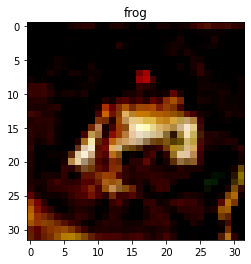

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


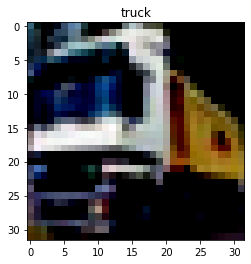

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


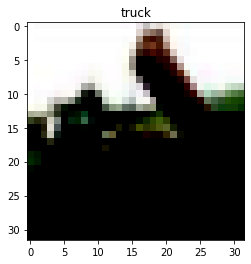

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


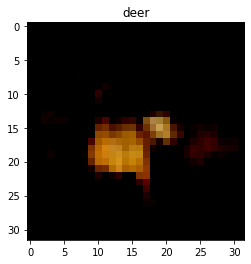

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) torch.float32 <class 'torch.Tensor'>
<class 'int'>


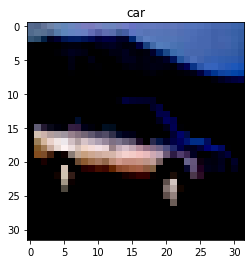

In [138]:
for i in range(5):
  x,y=trainset[i]
  print(x.shape,x.dtype,type(x))
  print(type(y))
  plt.imshow(x.permute(1,2,0))
  plt.title(classes[y])
  plt.show()

In [139]:
print(len(trainset))
print(len(testset))

50000
10000


In [140]:
train_loader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=2)
test_loader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=False,num_workers=2)


In [141]:
print(len(train_loader))
print(len(test_loader))

782
157


In [142]:
for x,y in train_loader:
  print(type(x),x.dtype,x.shape)
  print(type(y),y.dtype,y.shape)
  break

<class 'torch.Tensor'> torch.float32 torch.Size([64, 3, 32, 32])
<class 'torch.Tensor'> torch.int64 torch.Size([64])


In [143]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [144]:
from torch.nn.modules.normalization import LayerNorm
from torch.nn.modules.activation import Softmax
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.praveen=nn.Sequential(
                  nn.Conv2d(3,64,kernel_size=3,padding=1),
                  nn.BatchNorm2d(64),
                  nn.ReLU(),
                  nn.MaxPool2d(2),
                  nn.Dropout(0.2),
                  nn.Conv2d(64,128,kernel_size=3,padding=1),
                  nn.BatchNorm2d(128),
                  nn.ReLU(),
                  nn.MaxPool2d(2),
                  nn.Dropout(0.2),
                  nn.Conv2d(128,256,kernel_size=3,padding=1),
                  nn.BatchNorm2d(256),
                  nn.ReLU(),
                  nn.MaxPool2d(2),
                  nn.Dropout(0.2))
    self.praveen2=nn.Sequential(
                  nn.Linear(256*4*4,128),
                  nn.ReLU(),
                  nn.Linear(128,64),
                  nn.ReLU(),
                  nn.Linear(64,10))
    
  def forward(self,x):
    x=self.praveen(x)
    x=x.view(-1,256*4*4)
    x=self.praveen2(x)
    return x
model=Network().to(device)
print(model)

Network(
  (praveen): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.2, inplace=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.2, inplace=False)
  )
  (praveen2): Sequential(
    (0): Linear(in

In [145]:
img,label=trainset[1]
conv=nn.Conv2d(3,64,kernel_size=3,padding=1)
Relu= nn.ReLU()
maxpool=nn.MaxPool2d(2)
conv2=nn.Conv2d(64,128,kernel_size=3,padding=1)
conv3=nn.Conv2d(128,256,kernel_size=3,padding=1)

In [146]:
a=conv(img.unsqueeze(0))
a1=Relu(a)
a2=maxpool(a1)
a3=conv2(a2)
a4=Relu(a3)
a5=maxpool(a4)
a6=conv3(a5)
a7=Relu(a6)
a8=maxpool(a7)
print(a8.shape)


torch.Size([1, 256, 4, 4])


In [147]:
total = 0
print('Trainable parameters:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, '\t', param.numel())
        total += param.numel()
print()
print('Total', '\t', total)

Trainable parameters:
praveen.0.weight 	 1728
praveen.0.bias 	 64
praveen.1.weight 	 64
praveen.1.bias 	 64
praveen.5.weight 	 73728
praveen.5.bias 	 128
praveen.6.weight 	 128
praveen.6.bias 	 128
praveen.10.weight 	 294912
praveen.10.bias 	 256
praveen.11.weight 	 256
praveen.11.bias 	 256
praveen2.0.weight 	 524288
praveen2.0.bias 	 128
praveen2.2.weight 	 8192
praveen2.2.bias 	 64
praveen2.4.weight 	 640
praveen2.4.bias 	 10

Total 	 905034


In [148]:
lr=0.001
loss1=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr,momentum=0.9)

In [149]:
def train(dataloader,model,loss_fn,optimizer):
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    pred=model(X)
    loss=loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
  loss=loss.item()
  print(f'loss:{loss:>5f}')
  

In [150]:
def test(dataloader,model,loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct=0,0
  with torch.no_grad():
      for batch,(X,y) in enumerate(dataloader):
          X,y=X.to(device),y.to(device)
          pred=model(X)
          test_loss+=loss_fn(pred,y).item()
          correct+=(pred.argmax(1)==y).sum().item()
      test_loss/=num_batches
      correct/=size
      print(f'test error-{test_loss:>5f} \n Accuracy-{correct*100:>3f}%')

In [151]:
epochs=100
for epoch in range(epochs):
  print(f'Epoch-{epoch}')
  train(train_loader,model,loss1,optimizer)
  #t0 = time.time()
  #print('{} seconds'.format(time.time() - t0))
  test(test_loader,model,loss1)

Epoch-0
loss:1.709077
test error-1.393101 
 Accuracy-48.670000%
Epoch-1
loss:1.231586
test error-1.174803 
 Accuracy-57.770000%
Epoch-2
loss:1.286846
test error-1.117011 
 Accuracy-59.830000%
Epoch-3
loss:0.801270
test error-0.999234 
 Accuracy-63.960000%
Epoch-4
loss:0.972645
test error-0.932553 
 Accuracy-67.030000%
Epoch-5
loss:1.031779
test error-0.892821 
 Accuracy-68.790000%
Epoch-6
loss:1.552764
test error-0.886278 
 Accuracy-67.910000%
Epoch-7
loss:0.464444
test error-0.831639 
 Accuracy-70.100000%
Epoch-8
loss:0.607177
test error-0.789667 
 Accuracy-71.760000%
Epoch-9
loss:0.825419
test error-0.755982 
 Accuracy-73.720000%
Epoch-10
loss:1.075228
test error-0.717931 
 Accuracy-74.950000%
Epoch-11
loss:0.924120
test error-0.695714 
 Accuracy-75.740000%
Epoch-12
loss:0.744247
test error-0.674510 
 Accuracy-76.250000%
Epoch-13
loss:0.458310
test error-0.658264 
 Accuracy-77.190000%
Epoch-14
loss:0.949030
test error-0.716358 
 Accuracy-75.340000%
Epoch-15
loss:0.886713
test error-0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


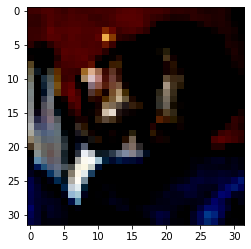

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  cat
predicted is cat


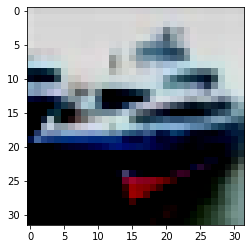

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  ship
predicted is ship


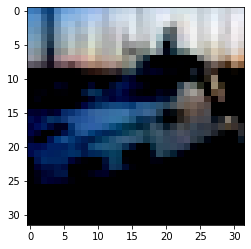

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  ship
predicted is ship


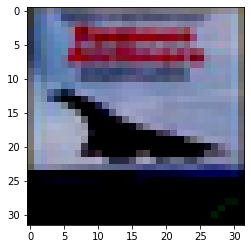

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  plane
predicted is plane


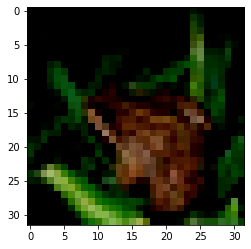

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  frog
predicted is frog


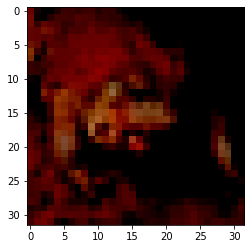

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  frog
predicted is frog


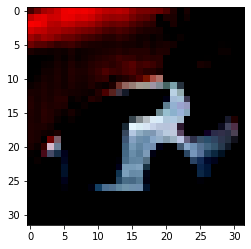

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  car
predicted is cat


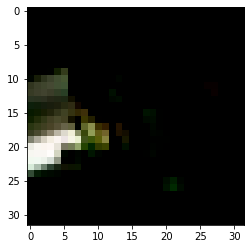

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  frog
predicted is frog


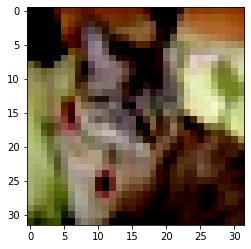

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  cat
predicted is cat


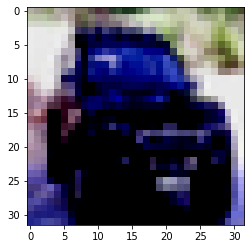

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  car
predicted is car


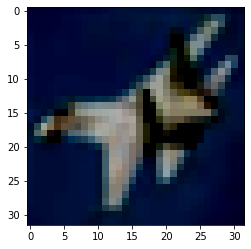

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  plane
predicted is plane


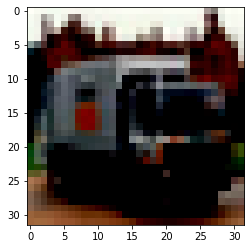

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  truck
predicted is truck


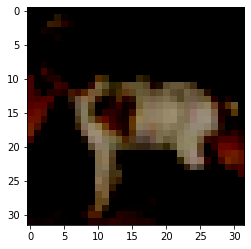

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  dog
predicted is dog


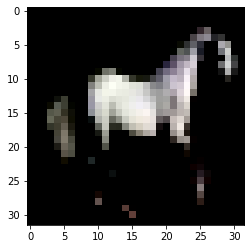

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  horse
predicted is horse


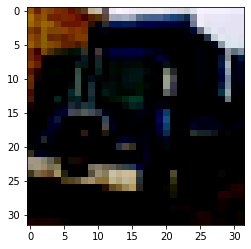

real value is  truck
predicted is truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


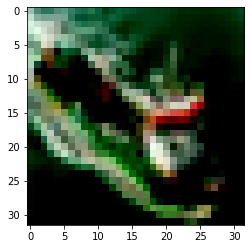

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  ship
predicted is ship


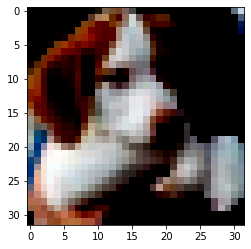

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  dog
predicted is dog


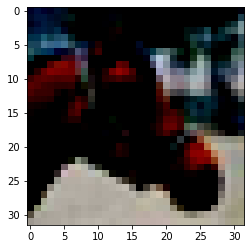

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  horse
predicted is horse


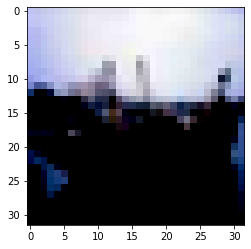

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  ship
predicted is ship


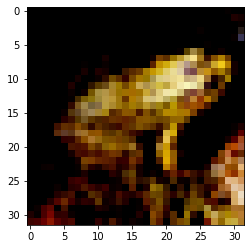

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real value is  frog
predicted is frog


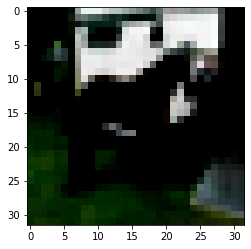

real value is  horse
predicted is horse


In [156]:
model.eval()
flat=nn.Flatten()
test_loader1=torch.utils.data.DataLoader(testset,batch_size=None,shuffle=False)
count=0
for pred_x,pred_y in test_loader1:
    if count>20:
        break
    plt.imshow(pred_x.permute(1,2,0).squeeze(2))
    plt.show()
    pred_x,pred_y=pred_x.to(device),(torch.tensor(pred_y)).to(device)
    print('real value is ',classes[pred_y])
    with torch.no_grad():
        pred=model(pred_x.unsqueeze(0))
        predicted=pred.argmax(1)
        print('predicted is',classes[predicted])
    count+=1

In [155]:
test(test_loader,model,loss1)
# OUR MODEL HAS 84% ACCURACY . A IMPROVED COMPARED TO OUR MODEL WITHOUT CNN

test error-0.687814 
 Accuracy-83.770000%


In [157]:
pwd()

'C:\\Users\\DELL\\Desktop\\Python'